In [6]:

for kv in ENV
    println(kv)
end

"ALLUSERSPROFILE" => "C:\\ProgramData"
"APPDATA" => "C:\\Users\\dev\\AppData\\Roaming"
"ASL.LOG" => "Destination=file"
"COLUMNS" => "80"
"COMMONPROGRAMFILES" => "C:\\Program Files\\Common Files"
"COMMONPROGRAMFILES(X86)" => "C:\\Program Files (x86)\\Common Files"
"COMMONPROGRAMW6432" => "C:\\Program Files\\Common Files"
"COMPUTERNAME" => "DAVEZ-ASUS-LAPT"
"COMSPEC" => "C:\\WINDOWS\\system32\\cmd.exe"
"DRIVERDATA" => "C:\\Windows\\System32\\Drivers\\DriverData"
"HOMEDRIVE" => "C:"
"HOMEPATH" => "\\Users\\dev"
"LINES" => "30"
"LOCALAPPDATA" => "C:\\Users\\dev\\AppData\\Local"
"LOGONSERVER" => "\\\\DAVEZ-ASUS-LAPT"
"NUMBER_OF_PROCESSORS" => "8"
"ONEDRIVE" => "C:\\Users\\dev\\OneDrive"
"ONEDRIVECONSUMER" => "C:\\Users\\dev\\OneDrive"
"OPENBLAS_MAIN_FREE" => "1"
"OS" => "Windows_NT"
"PATH" => "C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\ffmpeg\\bin;C:\\ProgramData\\Oracle\\Java\\javapath;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System3

In [7]:

using Pkg

Pkg.add(PackageSpec(url="https://github.com/probcomp/Gen"))

Pkg.Types.PkgError: https://github.com/probcomp/Gen is not a valid packagename.
The argument appears to be a URL or path, perhaps you meant `Pkg.add(PackageSpec(url="..."))` or `Pkg.add(PackageSpec(path="..."))`.

In [8]:

using Gen

a = 1 + 1

┌ Info: Precompiling Gen [ea4f424c-a589-11e8-07c0-fd5c91b9da4a]
└ @ Base loading.jl:1242


2

In [10]:

import Pkg; Pkg.add("PyPlot")
using PyPlot

  Updating registry at `C:\Users\dev\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed Reexport ────────── v0.2.0
 Installed LaTeXStrings ────── v1.0.3
 Installed PyPlot ──────────── v2.8.2
 Installed Tokenize ────────── v0.5.6
 Installed ColorTypes ──────── v0.8.0
 Installed PyCall ──────────── v1.91.2
 Installed MacroTools ──────── v0.5.1
 Installed Colors ──────────── v0.9.6
 Installed FixedPointNumbers ─ v0.6.1
 Installed CSTParser ───────── v0.6.2
  Updating `C:\Users\dev\.julia\environments\v1.2\Project.toml`
  [d330b81b] + PyPlot v2.8.2
  Updating `C:\Users\dev\.julia\environments\v1.2\Manifest.toml`
  [00ebfdb7] + CSTParser v0.6.2
  [3da002f7] + ColorTypes v0.8.0
  [5ae59095] + Colors v0.9.6
  [53c48c17] + FixedPointNumbers v0.6.1
  [b964fa9f] + LaTeXStrings v1.0.3
  [1914dd2f] + MacroTools v0.5.1
  [438e738f] + PyCall v1.91.2
  [d330b81b] + PyPlot v2.8.2
  [189a3867] + Reexport v0.2.0
  [07

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1242
┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall C:\Users\dev\.julia\packages\PyCall\ttONZ\src\PyCall.jl:705
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda C:\Users\dev\.julia\packages\Conda\kLXeC\src\Conda.jl:112


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dev\.julia\conda\3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |   py36h009560c_0          13 KB
    freetype-2.9.1             |       ha9979f8_1         450 KB
    icu-58.2                   |       ha66f8fd_1         9.4 MB
    jpeg-9b                    |       hb83a4c4_2         245 KB
    kiwisolver-1.1.0           |   py36ha925a31_0          53 KB
    libpng-1.6.37              |       h2a8f88b_0         333 KB
    matplotlib-3.1.1           |   py36hc8f65d3_0         4.9 MB
    pyparsing-2.4.2            |             py_0          61 KB
    pyqt-5.9.2                 |   py36h6538335_2         3.3 MB
    python-dateutil-2.8.0      |           py36_0         266 KB
    pytz-2019.2                |             py_

In [11]:

typeof(:foo)

Symbol

In [12]:

typeof("foo")

String

In [13]:

@gen function line_model(xs::Vector{Float64})
    n = length(xs)
    
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = @trace(normal(0, 1), :slope)
    intercept = @trace(normal(0, 2), :intercept)
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    for (i, x) in enumerate(xs)
        @trace(normal(slope * x + intercept, 0.1), (:y, i))
    end
    
    # The return value of the model is often not particularly important,
    # Here, we simply return n, the number of points.
    return n
end;

In [14]:

xs = [-5., -4., -3., -.2, -1., 0., 1., 2., 3., 4., 5.];

In [15]:

n = line_model(xs)
println(n)

11


In [16]:

trace = Gen.simulate(line_model, (xs,));

In [17]:

println(trace)

Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}(DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[Array{Float64,1}], ##line_model#371, Bool[0], false), Trie{Any,Gen.ChoiceOrCallRecord}(Dict{Any,Gen.ChoiceOrCallRecord}((:y, 7) => Gen.ChoiceOrCallRecord{Float64}(1.569775197607286, -0.08246384736985335, NaN, true),(:y, 9) => Gen.ChoiceOrCallRecord{Float64}(3.8035655232821934, 1.3660063676754615, NaN, true),(:y, 1) => Gen.ChoiceOrCallRecord{Float64}(-4.520223918570092, 1.3688062510401593, NaN, true),(:y, 10) => Gen.ChoiceOrCallRecord{Float64}(4.824235943459507, 1.3084493880950965, NaN, true),(:y, 5) => Gen.ChoiceOrCallRecord{Float64}(-0.5802579248482039, -1.494776751518511, NaN, true),(:y, 4) => Gen.ChoiceOrCallRecord{Float64}(0.5014085269763112, 1.3794166653844453, NaN, true),:intercept => Gen.ChoiceOrCallRecord{Float64}(0.7003444272402609, -1.6733960033604292, NaN, true),(:y, 3) => Gen.ChoiceOrCallRecord{Float64}(-2.5477385142753515, 0.588853720042542, NaN, true),(:y, 6) 

In [18]:

Gen.get_args(trace)

([-5.0, -4.0, -3.0, -0.2, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0],)

In [19]:

println(Gen.get_choices(trace))

│
├── (:y, 7) : 1.569775197607286
│
├── (:y, 9) : 3.8035655232821934
│
├── (:y, 1) : -4.520223918570092
│
├── (:y, 10) : 4.824235943459507
│
├── (:y, 5) : -0.5802579248482039
│
├── (:y, 4) : 0.5014085269763112
│
├── :intercept : 0.7003444272402609
│
├── (:y, 3) : -2.5477385142753515
│
├── (:y, 6) : 0.5088728618802322
│
├── (:y, 8) : 3.0486693811474503
│
├── (:y, 11) : 5.738689836134941
│
├── (:y, 2) : -3.4571377459032315
│
└── :slope : 1.0406680564445163



In [20]:

choices = Gen.get_choices(trace)
println(choices[:slope])

1.0406680564445163


In [21]:

println(trace[:slope])

1.0406680564445163


In [22]:

println(Gen.get_retval(trace));

11


In [23]:

function render_trace(trace; show_data=true)
    
    # Pull out xs from the trace
    xs = get_args(trace)[1]
    
    xmin = minimum(xs)
    xmax = maximum(xs)
    if show_data
        ys = [trace[(:y, i)] for i=1:length(xs)]
        
        # Plot the data set
        scatter(xs, ys, c="black")
    end
    
    # Pull out slope and intercept from the trace
    slope = trace[:slope]
    intercept = trace[:intercept]
    
    # Draw the line
    plot([xmin, xmax], slope *  [xmin, xmax] .+ intercept, color="black", alpha=0.5)
    ax = gca()
    ax[:set_xlim]((xmin, xmax))
    ax[:set_ylim]((xmin, xmax))
end;

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #render_trace#5(::Bool, ::typeof(render_trace), ::Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}) at In[23]:23
└ @ Main .\In[23]:23


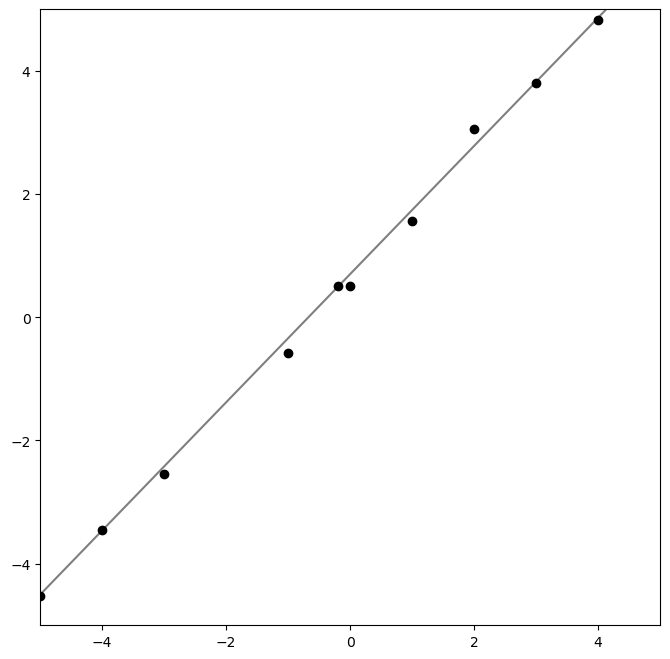

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #render_trace#5(::Bool, ::typeof(render_trace), ::Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}) at In[23]:24
└ @ Main .\In[23]:24


In [24]:

figure(figsize=(8,8))
render_trace(trace);

In [25]:

function grid(renderer::Function, traces; ncols=6, nrows=3)
    figure(figsize=(16, 8))
    for (i, trace) in enumerate(traces)
        subplot(nrows, ncols, i)
        renderer(trace)
    end
end;

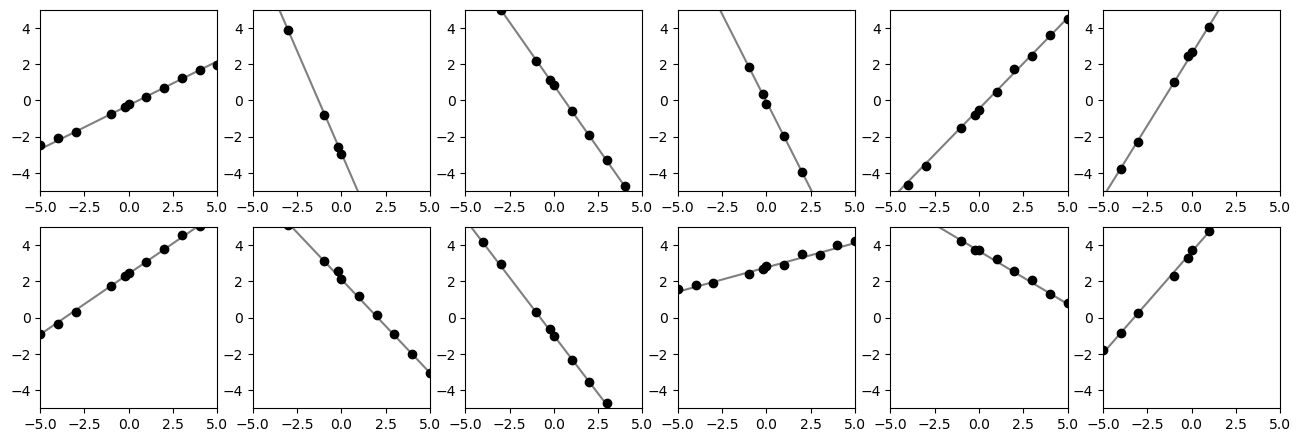

In [26]:

traces = [Gen.simulate(line_model, (xs,)) for _=1:12]
grid(render_trace, traces)

In [27]:

@gen function sine_model(xs::Vector{Float64})
    n = length(xs)
    phase = @trace(uniform(0, 2 * pi), :phase)
    period = @trace(gamma(5, 1), :period)
    amplitude = @trace(gamma(1, 1), :amplitude)
    for (i, x) in enumerate(xs)
        mu = amplitude * sin(2 * pi * x / period + phase)
        @trace(normal(mu, 0.1), (:y, i))
    end
    return n
end;

In [28]:

function render_sine_trace(trace; show_data=true)
    xs = get_args(trace)[1]
    xmin = minimum(xs)
    xmax = maximum(xs)
    if show_data
        ys = [trace[(:y, i)] for i=1:length(xs)]
        scatter(xs, ys, c="black")
    end
    
    phase = trace[:phase]
    period = trace[:period]
    amplitude = trace[:amplitude]
    
    test_points = collect(range(xmin, stop=xmax, length=100))
    plot(test_points, amplitude * sin.(2 * pi * test_points / period .+ phase))
    
    ax = gca()
    ax[:set_xlim]((xmin, xmax))
    ax[:set_ylim]((xmin, xmax))
end;

In [29]:

traces = [Gen.simulate(sine_model, (xs,)) for _=1:12];

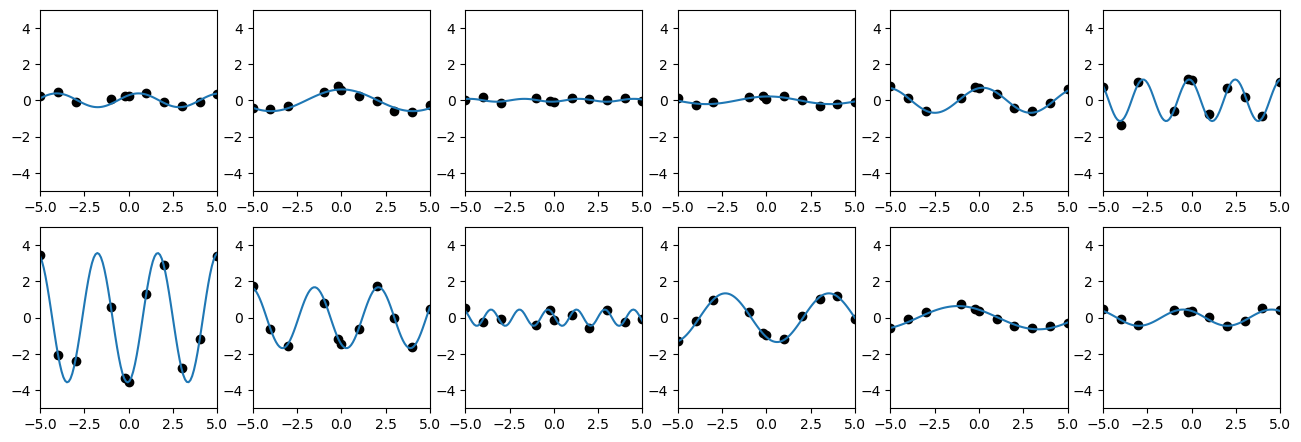

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #render_sine_trace#11(::Bool, ::typeof(render_sine_trace), ::Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}) at In[28]:19
└ @ Main .\In[28]:19
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #render_sine_trace#11(::Bool, ::typeof(render_sine_trace), ::Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}) at In[28]:20
└ @ Main .\In[28]:20


In [30]:

figure(figsize=(16, 8))
for (i, trace) in enumerate(traces)
    subplot(3, 6, i)
    render_sine_trace(trace)
end

In [32]:

ys = [6.75003, 6.1568, 4.26414, 1.84894, 3.09686, 1.94026, 1.36411, -0.83959, -0.976, -1.93363, -2.91303];

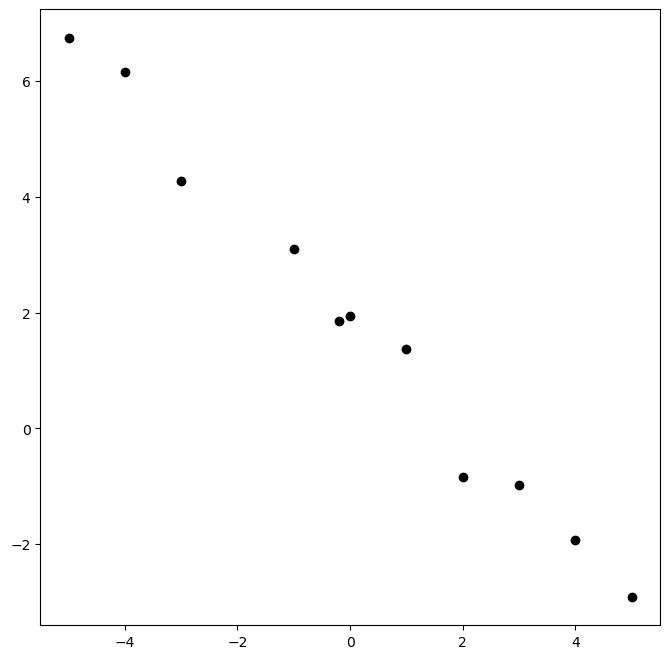

In [33]:

figure(figsize=(8,8))
scatter(xs, ys, color="black");

In [34]:

function do_inference(model, xs, ys, amount_of_computation)
    
    # Create a choice map that maps model addresses (:y, i)
    # to observed values ys[i]. We leave :slope and :intercept
    # unconstrained, because we want them to be inferred.
    observations = Gen.choicemap()
    for (i, y) in enumerate(ys)
        observations[(:y, i)] = y
    end
    
    # Call importance_resampling to obtain a likely trace consistent
    # with our observations.
    (trace, _) = Gen.importance_resampling(model, (xs,), observations, amount_of_computation);
    return trace
end;

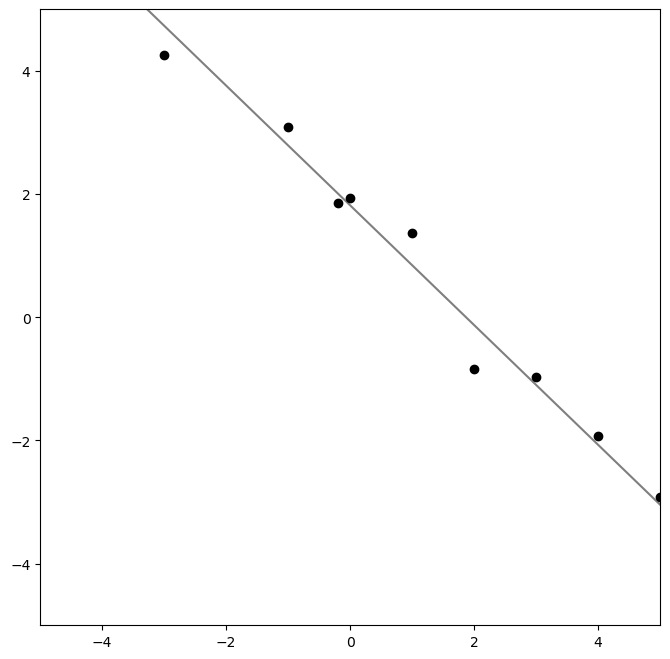

In [35]:

trace = do_inference(line_model, xs, ys, 100)
figure(figsize=(8,8))
render_trace(trace);

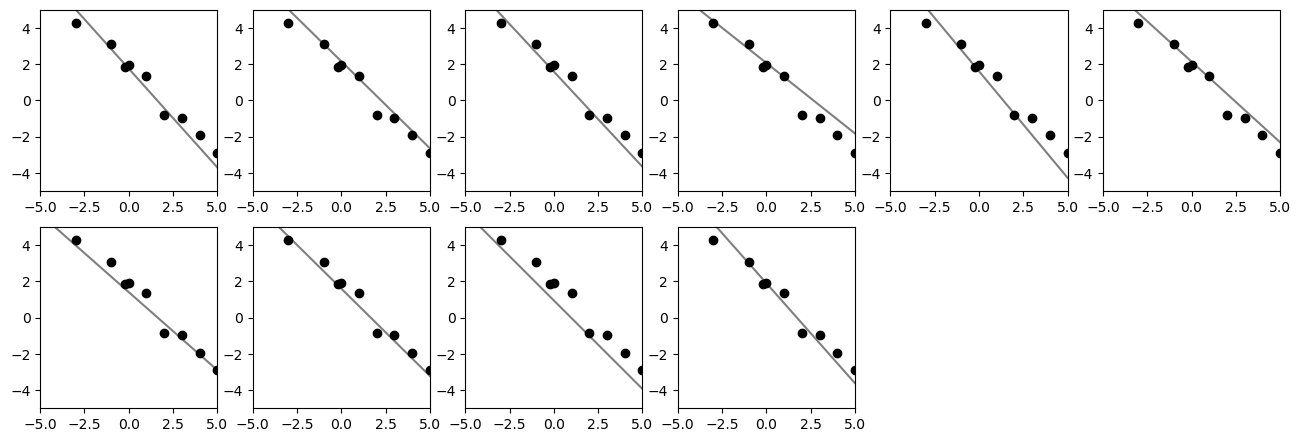

In [36]:

figure(figsize=(16, 8))
traces = [do_inference(line_model, xs, ys, 100) for _=1:10];
grid(render_trace, traces)

In [37]:

function overlay(renderer, traces; same_data=true, args...)
    renderer(traces[1], show_data=true, args...)
    for i=2:length(traces)
        renderer(traces[i], show_data=!same_data, args...)
    end
end;

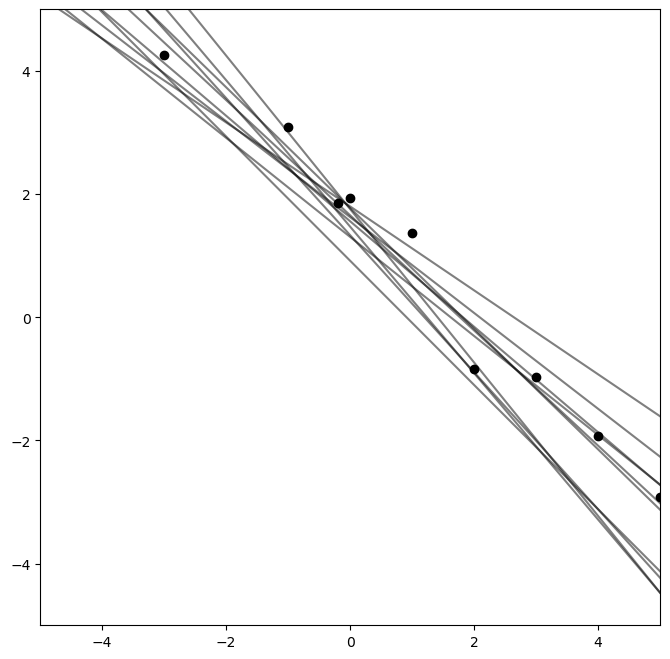

In [38]:

traces = [do_inference(line_model, xs, ys, 100) for _=1:10];
figure(figsize=(8,8))
overlay(render_trace, traces);

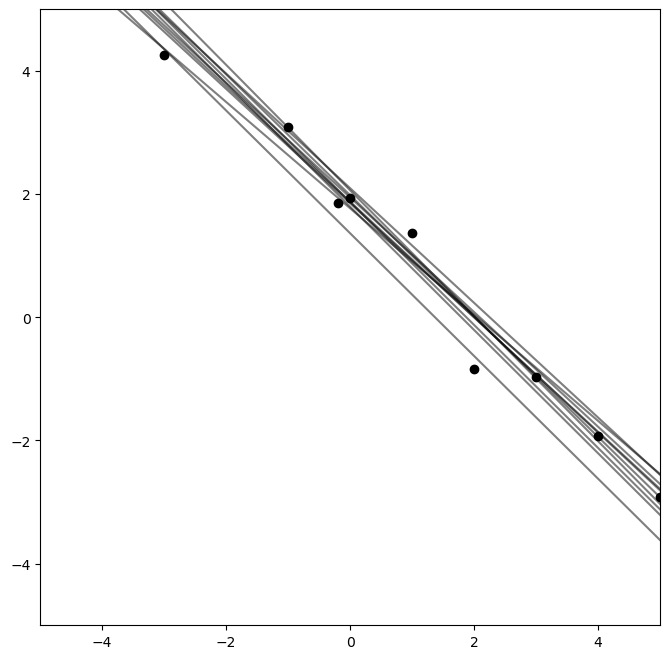

In [39]:

traces = [do_inference(line_model, xs, ys, 1000) for _=1:10];
figure(figsize=(8,8))
overlay(render_trace, traces);

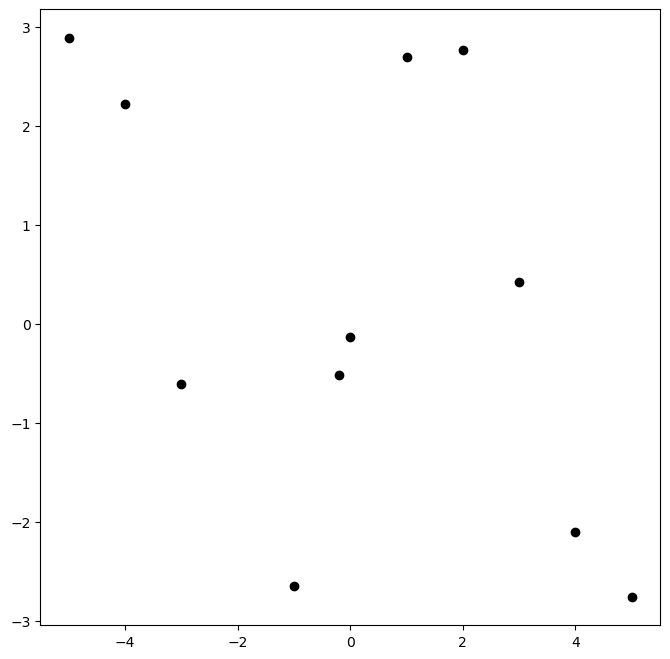

In [40]:

ys_sine = [2.89, 2.22, -0.612, -0.522, -2.65, -0.133, 2.70, 2.77, 0.425, -2.11, -2.76];
figure(figsize=(8, 8));
scatter(xs, ys_sine, color="black");

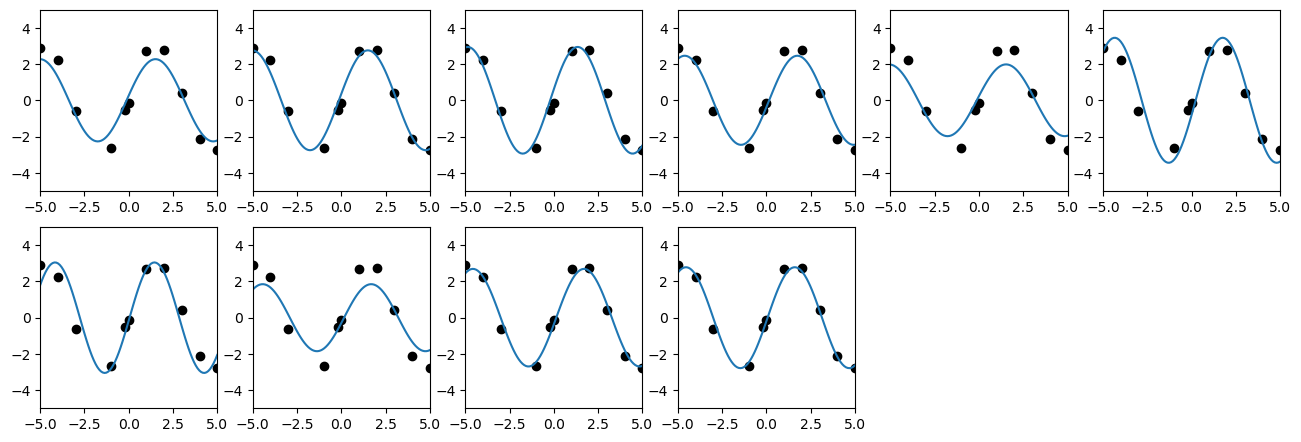

In [47]:

figure(figsize=(16, 8))
traces = [do_inference(sine_model, xs, ys_sine, 1000) for _=1:10];
grid(render_sine_trace, traces)

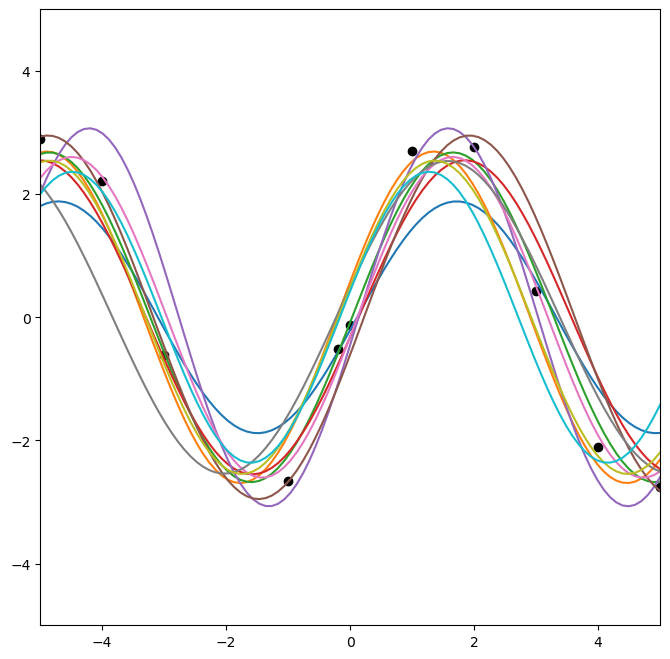

In [48]:

traces = [do_inference(sine_model, xs, ys_sine, 1000) for _=1:10];
figure(figsize=(8, 8))
overlay(render_sine_trace, traces);

In [49]:

@gen function sine_model(xs::Vector{Float64})
    n = length(xs)
    phase = @trace(uniform(0, 2 * pi), :phase)
    period = @trace(gamma(1, 1), :period)
    amplitude = @trace(gamma(1, 1), :amplitude)
    for (i, x) in enumerate(xs)
        mu = amplitude * sin(2 * pi * x / period + phase)
        @trace(normal(mu, 0.1), (:y, i))
    end
    return n
end;

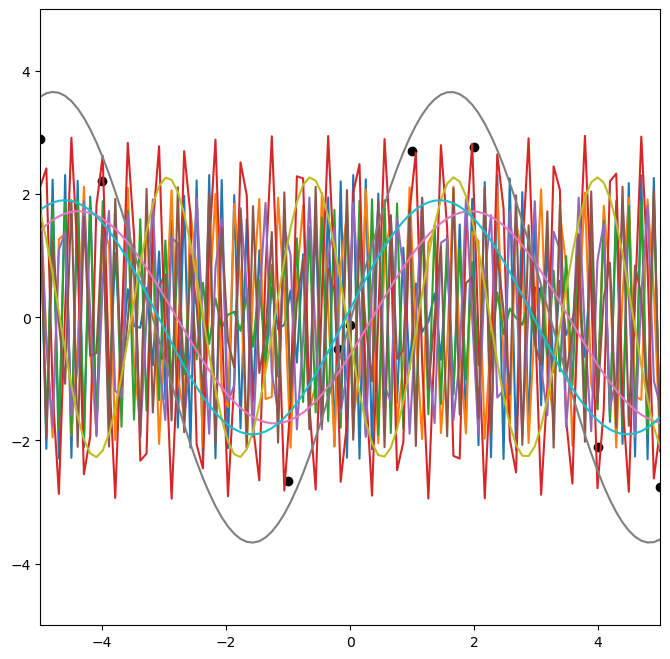

In [50]:

traces = [do_inference(sine_model, xs, ys_sine, 1000) for _=1:10];
figure(figsize=(8, 8))
overlay(render_sine_trace, traces);

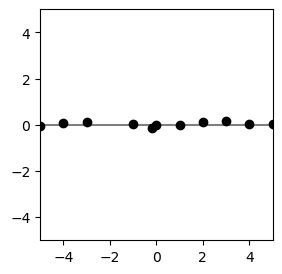

In [53]:

constraints = Gen.choicemap()
constraints[:slope] = 0.
constraints[:intercept] = 0.
(trace, _) = Gen.generate(line_model, (xs,), constraints)
figure(figsize=(3,3))
render_trace(trace);

In [54]:

function predict_new_data(model, trace, new_xs::Vector{Float64}, param_addrs)
    
    # Copy parameter values from the inferred trace (`trace`)
    # into a fresh set of constraints.
    constraints = Gen.choicemap()
    for addr in param_addrs
        constraints[addr] = trace[addr]
    end
    
    # Run the model with new x coordinates, and with parameters 
    # fixed to be the inferred values
    (new_trace, _) = Gen.generate(model, (new_xs,), constraints)
    
    # Pull out the y-values and return them
    ys = [new_trace[(:y, i)] for i=1:length(new_xs)]
    return ys
end;

In [55]:

function infer_and_predict(model, xs, ys, new_xs, param_addrs, num_traces, amount_of_computation)
    pred_ys = []
    for i=1:num_traces
        trace = do_inference(model, xs, ys, amount_of_computation)
        push!(pred_ys, predict_new_data(model, trace, new_xs, param_addrs))
    end
    pred_ys
end;

In [56]:

function plot_predictions(xs, ys, new_xs, pred_ys)
    scatter(xs, ys, color="red")
    for pred_ys_single in pred_ys
        scatter(new_xs, pred_ys_single, color="black", s=1, alpha=0.3)
    end
end;

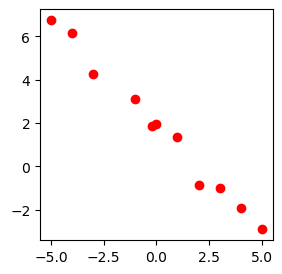

In [57]:

figure(figsize=(3,3))
scatter(xs, ys, color="red");

In [58]:

new_xs = collect(range(-5, stop=10, length=100));

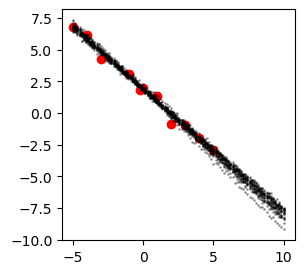

In [59]:

pred_ys = infer_and_predict(line_model, xs, ys, new_xs, [:slope, :intercept], 20, 1000)
figure(figsize=(3,3))
plot_predictions(xs, ys, new_xs, pred_ys)

In [60]:

ys_noisy = [5.092, 4.781, 2.46815, 1.23047, 0.903318, 1.11819, 2.10808, 1.09198, 0.0203789, -2.05068, 2.66031];

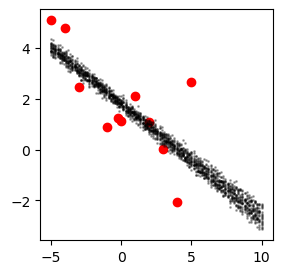

In [61]:

pred_ys = infer_and_predict(line_model, xs, ys_noisy, new_xs, [:slope, :intercept], 20, 1000)
figure(figsize=(3,3))
plot_predictions(xs, ys_noisy, new_xs, pred_ys)

In [62]:

@gen function line_model_2(xs::Vector{Float64})
    n = length(xs)
    slope = @trace(normal(0, 1), :slope)
    intercept = @trace(normal(0, 2), :intercept)
    noise = @trace(gamma(1, 1), :noise)
    for (i, x) in enumerate(xs)
        @trace(normal(slope * x + intercept, noise), (:y, i))
    end
    return nothing
end;

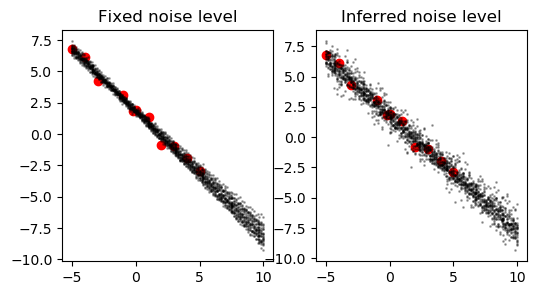

In [63]:

figure(figsize=(6,3))

pred_ys = infer_and_predict(line_model, xs, ys, new_xs, [:slope, :intercept], 20, 1000)
subplot(1, 2, 1)
title("Fixed noise level")
plot_predictions(xs, ys, new_xs, pred_ys)

pred_ys = infer_and_predict(line_model_2, xs, ys, new_xs, [:slope, :intercept, :noise], 20, 10000)
subplot(1, 2, 2)
title("Inferred noise level")
plot_predictions(xs, ys, new_xs, pred_ys)

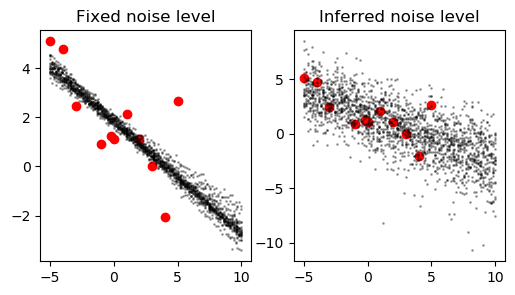

In [64]:

figure(figsize=(6,3))

pred_ys = infer_and_predict(line_model, xs, ys_noisy, new_xs, [:slope, :intercept], 20, 1000)
subplot(1, 2, 1)
title("Fixed noise level")
plot_predictions(xs, ys_noisy, new_xs, pred_ys)

pred_ys = infer_and_predict(line_model_2, xs, ys_noisy, new_xs, [:slope, :intercept, :noise], 20, 10000)
subplot(1, 2, 2)
title("Inferred noise level")
plot_predictions(xs, ys_noisy, new_xs, pred_ys)

In [65]:

@gen function sine_model_2(xs::Vector{Float64})
    n = length(xs)
    phase = @trace(uniform(0, 2 * pi), :phase)
    period = @trace(gamma(5, 1), :period)
    amplitude = @trace(gamma(1, 1), :amplitude)
    noise = @trace(gamma(1, 1), :noise)
    for (i, x) in enumerate(xs)
        mu = amplitude * sin(2 * pi * x / period + phase)
        @trace(normal(mu, noise), (:y, i))
    end
    return n
end;

In [68]:

@gen function sine_model(xs::Vector{Float64})
    n = length(xs)
    phase = @trace(uniform(0, 2 * pi), :phase)
    period = @trace(gamma(5, 1), :period)
    amplitude = @trace(gamma(1, 1), :amplitude)
    for (i, x) in enumerate(xs)
        mu = amplitude * sin(2 * pi * x / period + phase)
        @trace(normal(mu, 0.1), (:y, i))
    end
    return n
end;

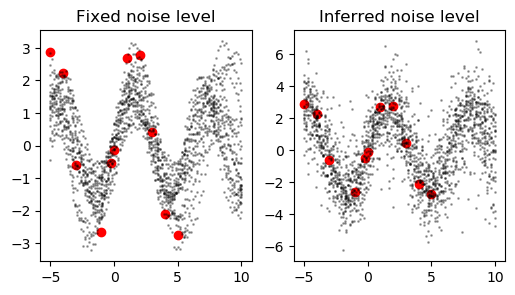

In [69]:

figure(figsize=(6,3))

pred_ys = infer_and_predict(sine_model, xs, ys_sine, new_xs, [:phase, :period, :amplitude], 20, 100)

subplot(1, 2, 1)
title("Fixed noise level")
plot_predictions(xs, ys_sine, new_xs, pred_ys)

pred_ys = infer_and_predict(sine_model_2, xs, ys_sine, new_xs, [:phase, :period, :amplitude, :noise], 20, 1000)

subplot(1, 2, 2)
title("Inferred noise level")
plot_predictions(xs, ys_sine, new_xs, pred_ys)

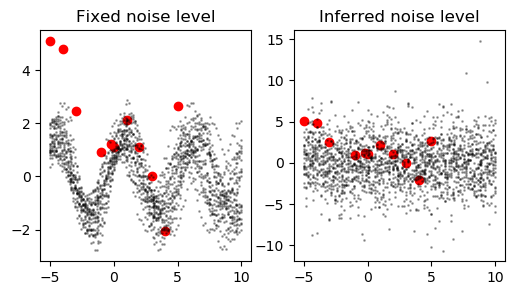

In [70]:

figure(figsize=(6,3))

pred_ys = infer_and_predict(sine_model, xs, ys_noisy, new_xs, [:phase, :period, :amplitude], 20, 100)

subplot(1, 2, 1)
title("Fixed noise level")
plot_predictions(xs, ys_noisy, new_xs, pred_ys)

pred_ys = infer_and_predict(sine_model_2, xs, ys_noisy, new_xs, [:phase, :period, :amplitude, :noise], 20, 1000)

subplot(1, 2, 2)
title("Inferred noise level")
plot_predictions(xs, ys_noisy, new_xs, pred_ys)

In [71]:

@gen function foo()
    @trace(normal(0, 1), :y)
end

@gen function bar()
    @trace(bernoulli(0.5), :x)
    @trace(foo())
end

@gen function bar_using_namespace()
    @trace(bernoulli(0.5), :x)
    @trace(foo(), :z)
end;

In [72]:

trace = Gen.simulate(bar, ())
println(Gen.get_choices(trace))

│
├── :y : -0.16797172639325936
│
└── :x : true



In [73]:

trace = Gen.simulate(bar_using_namespace, ())
println(Gen.get_choices(trace))

│
├── :x : true
│
└── :z
    │
    └── :y : -1.5563250280448842



In [74]:

trace[Pair(:z, :y)]

-1.5563250280448842

In [75]:

trace[:z => :y]

-1.5563250280448842

In [76]:

@gen function baz()
    @trace(bar_using_namespace(), :a)
end

trace = simulate(baz, ())

trace[:a => :z => :y]

-1.8841272114855492

In [77]:

println(Gen.get_choices(trace))

│
└── :a
    │
    ├── :x : true
    │
    └── :z
        │
        └── :y : -1.8841272114855492



In [78]:

trace[Pair(:a, Pair(:z, :y))]

-1.8841272114855492

In [79]:

@gen function combined_model(xs::Vector{Float64})
    if @trace(bernoulli(0.5), :is_line)
        @trace(line_model_2(xs))
    else
        @trace(sine_model_2(xs))
    end
end;

In [80]:

function render_combined(trace; show_data=true)
    if trace[:is_line]
        render_trace(trace, show_data=show_data)
    else
        render_sine_trace(trace, show_data=show_data)
    end
end;

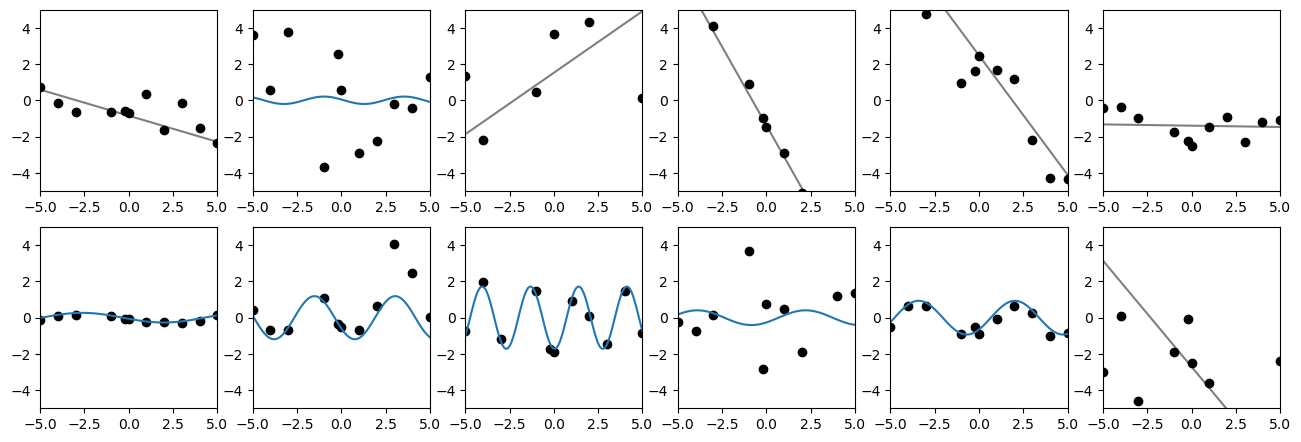

In [81]:

traces = [Gen.simulate(combined_model, (xs,)) for _=1:12];
grid(render_combined, traces)

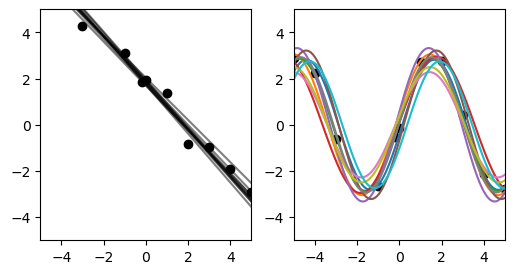

In [82]:

figure(figsize=(6,3))
subplot(1, 2, 1)
traces = [do_inference(combined_model, xs, ys, 10000) for _=1:10];
overlay(render_combined, traces)
subplot(1, 2, 2)
traces = [do_inference(combined_model, xs, ys_sine, 10000) for _=1:10];
overlay(render_combined, traces)

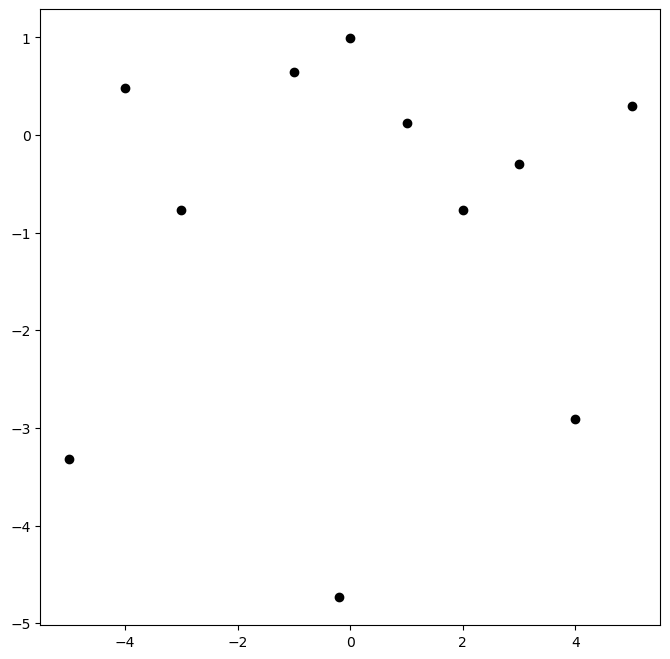

In [89]:

ys_ambiguous = [normal(0, 1) * 2 for _=1:11];
figure(figsize=(8, 8));
scatter(xs, ys_ambiguous, color="black");

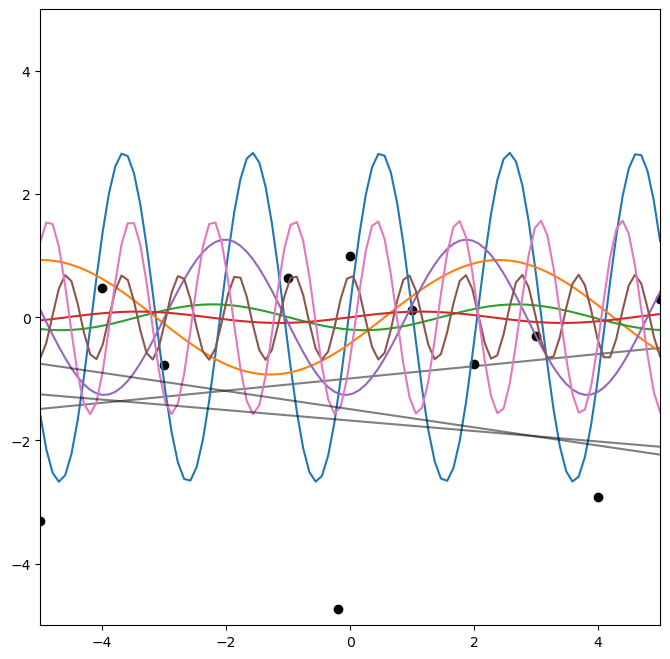

In [90]:

traces = [do_inference(combined_model, xs, ys_ambiguous, 1000) for _=1:10];
figure(figsize=(8, 8))
overlay(render_combined, traces);

In [95]:

total = 0
islines = 0
for trace in traces
    total = total + 1
    if trace[:is_line]
        islines = islines + 1
    end
end;
islines/total

0.3

In [97]:

xs_dense = collect(range(-5, stop=5, length=50))
ys_simple = fill(1., length(xs_dense)) .+ randn(length(xs_dense)) * 0.1
ys_complex = [Int(floor(abs(x/3))) % 2 == 0 ? 2 : 0 for x in xs_dense] .+ randn(length(xs_dense)) * 0.1;

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[98]:7
└ @ Core In[98]:7


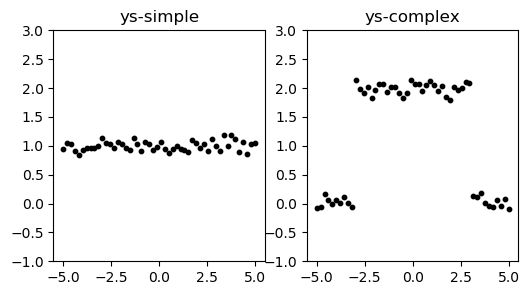

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[98]:12
└ @ Core In[98]:12


(-1, 3)

In [98]:

figure(figsize=(6,3))

subplot(1, 2, 1)
title("ys-simple")
scatter(xs_dense, ys_simple, color="black", s=10)
gca()[:set_ylim]((-1, 3))

subplot(1, 2, 2)
title("ys-complex")
scatter(xs_dense, ys_complex, color="black", s=10)
gca()[:set_ylim]((-1, 3))

In [99]:

struct Interval
    l::Float64
    u::Float64
end

In [100]:

abstract type Node end
    
struct InternalNode <: Node
    left::Node
    right::Node
    interval::Interval
end

struct LeafNode <: Node
    value::Float64
    interval::Interval
end

In [101]:

@gen function generate_segments(l::Float64, u::Float64)
    interval = Interval(l, u)
    if @trace(bernoulli(0.7), :isleaf)
        value = @trace(normal(0, 1), :value)
        return LeafNode(value, interval)
    else
        frac = @trace(beta(2, 2), :frac)
        mid  = l + (u - l) * frac
        left = @trace(generate_segments(l, mid), :left)
        right = @trace(generate_segments(mid, u), :right)
        return InternalNode(left, right, interval)
    end
end;

In [102]:

function render_node(node::LeafNode)
    plot([node.interval.l, node.interval.u], [node.value, node.value])
end

function render_node(node::InternalNode)
    render_node(node.left)
    render_node(node.right)
end;

In [103]:

function render_segments_trace(trace)
    node = get_retval(trace)
    render_node(node)
    ax = gca()
    ax[:set_xlim]((0, 1))
    ax[:set_ylim]((-3, 3))
end;

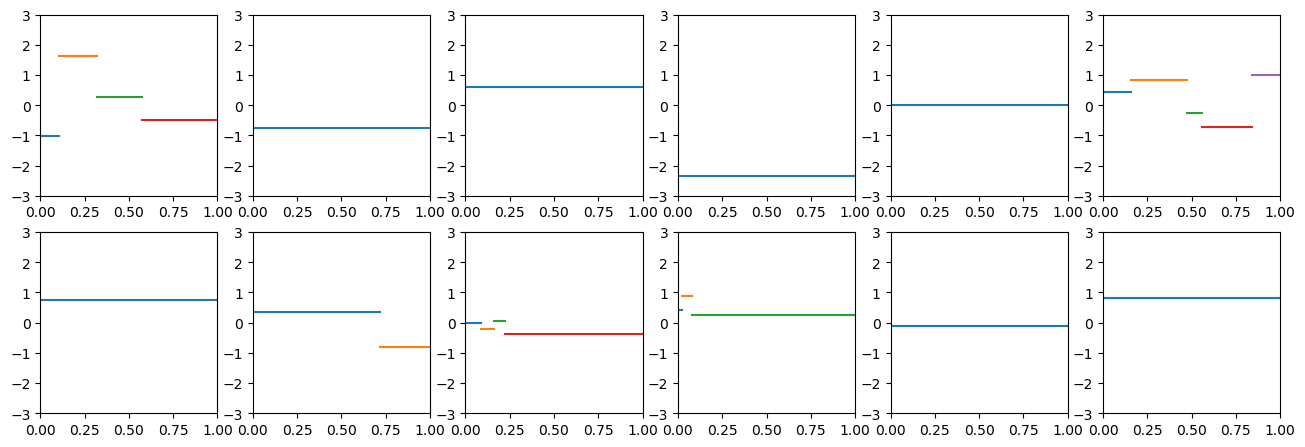

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = render_segments_trace(::Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}) at In[103]:6
└ @ Main .\In[103]:6
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = render_segments_trace(::Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}) at In[103]:7
└ @ Main .\In[103]:7


In [104]:

traces = [Gen.simulate(generate_segments, (0., 1.)) for i=1:12]
grid(render_segments_trace, traces)

In [105]:

# get_value_at searches a binary tree for
# the leaf node containing some value.
function get_value_at(x::Float64, node::LeafNode)
    @assert x >= node.interval.l && x <= node.interval.u
    return node.value
end

function get_value_at(x::Float64, node::InternalNode)
    @assert x >= node.interval.l && x <= node.interval.u
    if x <= node.left.interval.u
        get_value_at(x, node.left)
    else
        get_value_at(x, node.right)
    end
end

# Out full model
@gen function changepoint_model(xs::Vector{Float64})
    node = @trace(generate_segments(minimum(xs), maximum(xs)), :tree)
    noise = @trace(gamma(1, 1), :noise)
    for (i, x) in enumerate(xs)
        @trace(normal(get_value_at(x, node), noise), (:y, i))
    end
    return node
end;

In [106]:

function render_changepoint_model_trace(trace; show_data=true)
    xs = Gen.get_args(trace)[1]
    node = Gen.get_retval(trace)
    render_node(node)
    if show_data
        ys = [trace[(:y, i)] for i=1:length(xs)]
        scatter(xs, ys, c="black")
    end
    ax = gca()
    ax[:set_xlim]((minimum(xs), maximum(xs)))
    ax[:set_ylim]((-3, 3))
end;

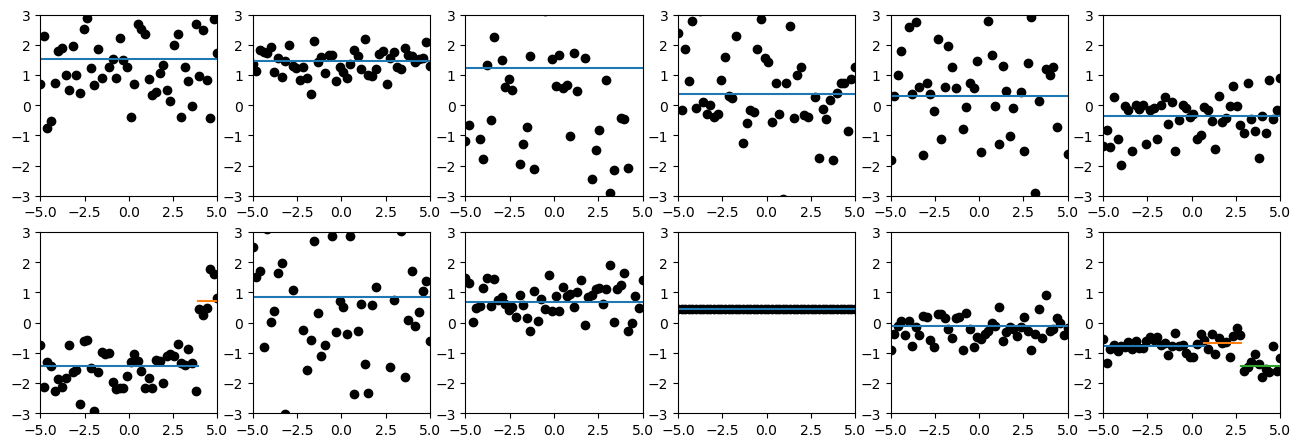

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #render_changepoint_model_trace#62(::Bool, ::typeof(render_changepoint_model_trace), ::Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}) at In[106]:11
└ @ Main .\In[106]:11
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #render_changepoint_model_trace#62(::Bool, ::typeof(render_changepoint_model_trace), ::Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}) at In[106]:12
└ @ Main .\In[106]:12


In [107]:

traces = [Gen.simulate(changepoint_model, (xs_dense,)) for i=1:12]
grid(render_changepoint_model_trace, traces)

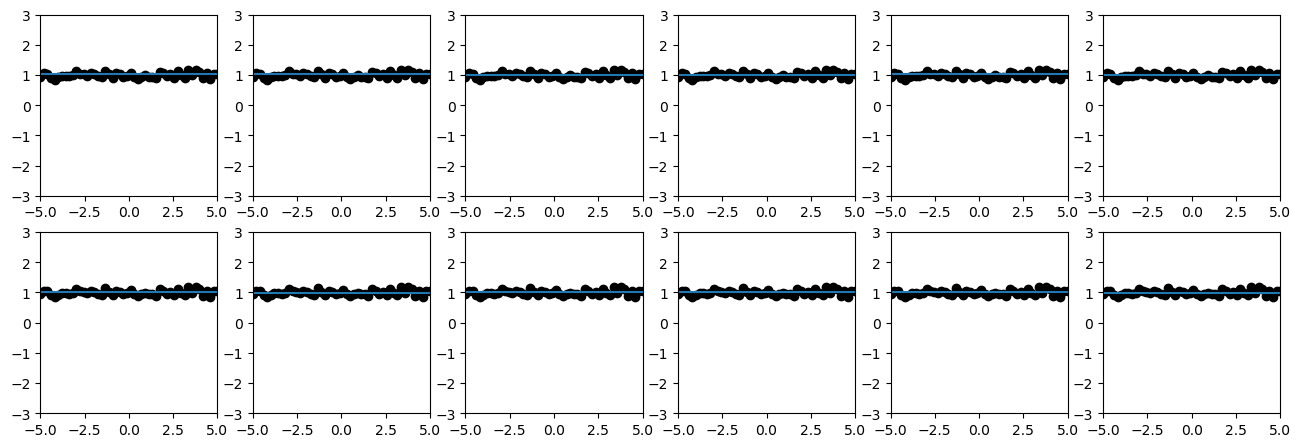

In [108]:

traces = [do_inference(changepoint_model, xs_dense, ys_simple, 10000) for _=1:12];
grid(render_changepoint_model_trace, traces)

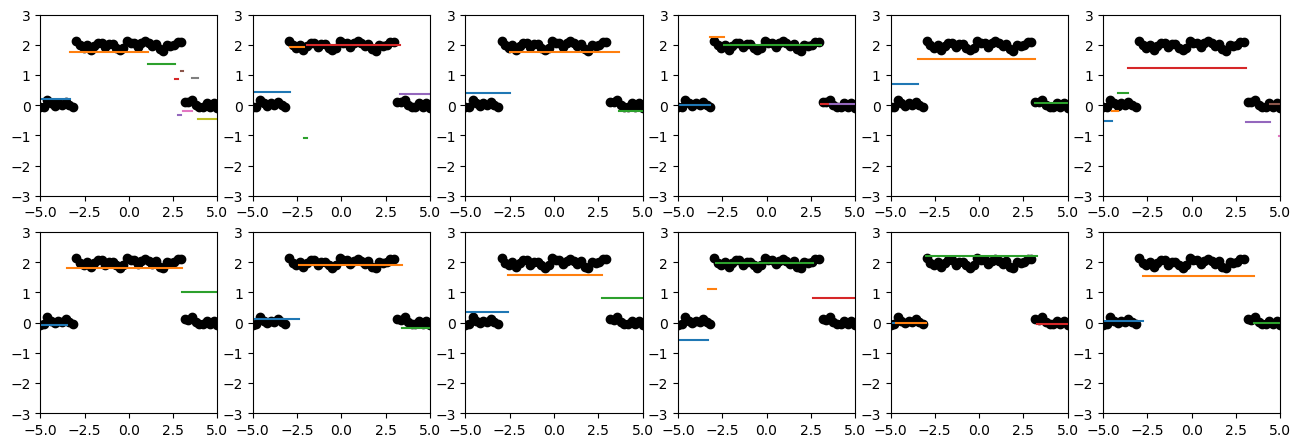

In [109]:

traces = [do_inference(changepoint_model, xs_dense, ys_complex, 100000) for _=1:12];
grid(render_changepoint_model_trace, traces)